# Operaciones convolucionales en imágenes digitales

In [1]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

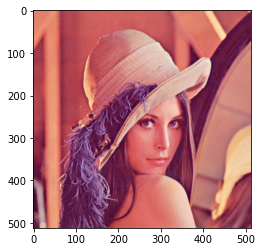

In [2]:
original_img = cv2.imread('Lenna.png')
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

plt.imshow(original_img)
plt.show()

Program finished in 18.64302773700001 seconds


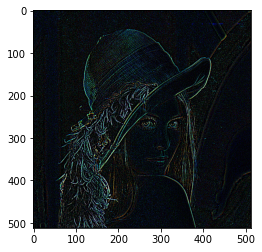

In [3]:
def convolution_v1(img, mask):
    '''
    Versión 1 de la operación de convolución en una imagen dígital
    Se recibe como entrada la imagen y la máscara de convolución
    1. se obtiene la parte de la imagen a la que se le aplicará la operación
    2. se suman y múltiplican sus elementos respecto las posiciones de la
    imagen y la máscara
    3. se restringen los valores a un rango de 0-255
    '''
    new_img=np.zeros(img.shape)
    # Iteración sobre los pixeles de la imagen
    for p_x in range(img.shape[0]):
        for p_y in range(img.shape[1]):
            for px in range(img.shape[2]):
                # Se restringen los pixeles de la esquina
                if (p_x>0 and p_x<img.shape[0]-1) and (p_y>0 and p_y<img.shape[1]-1):
                    part=[[img[p_x-1][p_y-1][px],img[p_x-1][p_y][px],img[p_x-1][p_y+1][px]],
                          [img[p_x][p_y-1][px],  img[p_x][p_y][px],  img[p_x][p_y+1][px]  ],
                          [img[p_x+1][p_y-1][px],img[p_x+1][p_y][px],img[p_x+1][p_y+1][px]]]
                    #Operación de concolución
                    value=part[0][0]*mask[0][0]+part[0][1]*mask[0][1]+part[0][2]*mask[0][2]+ part[1][0]*mask[1][0]+part[1][1]*mask[1][1]+part[1][2]*mask[1][2]+part[2][0]*mask[2][0]+part[2][1]*mask[2][1]+part[2][2]*mask[2][2] 
                    # se restringen los valores a un rango de 0-255
                    if value<0:
                        value=0.0
                    elif value>255:
                        value=255.0
                    # Se asigna el valor a la nueva imágen
                    new_img[p_x][p_y][px]=value
    # Se retorna como una matriz de enteros
    return new_img.astype(int)

# Se establece la máscara para detección de bordes
mask=[[-1.0, -1.0, -1.0],
      [-1.0,  8.0, -1.0],
      [-1.0, -1.0, -1.0]]

# Se mide el tiempo de ejecución de la versión de convolución
start_time = time.perf_counter()
img=convolution_v1(original_img, mask)
finish_time = time.perf_counter()

# Se imprime el tiempo de ejecución y se muestra la imagen
print(f"Program finished in {finish_time-start_time} seconds")
plt.imshow(img)
plt.show()

Program finished in 24.554818021999836 seconds


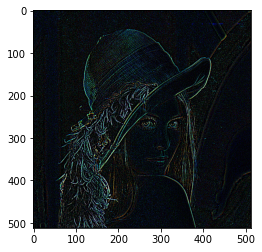

In [4]:
def convolution_v2(img, mask):
    '''
    Versión 2 de la operación de convolución en una imagen dígital
    Se recibe como entrada la imagen y la máscara de convolución
    Se utiliza la máscara como un numpy array
    1. se obtiene la parte de la imagen a la que se le aplicará la operación
    2. se suman y múltiplican sus elementos respecto las posiciones de la
    imagen y la máscara
    3. se restringen los valores a un rango de 0-255
    '''
    new_img=np.zeros(img.shape)
    mask=np.array(mask)
    # Se itera sobre los pixeles de la imagen
    for p_x in range(img.shape[0]):
        for p_y in range(img.shape[1]):
            for px in range(img.shape[2]):
                if (p_x>0 and p_x<img.shape[0]-1) and (p_y>0 and p_y<img.shape[1]-1):
                    # Se extrae la parte de la imagen donde se va a aplicar la convolución
                    part=np.array([[img[p_x-1][p_y-1][px],img[p_x-1][p_y][px],img[p_x-1][p_y+1][px]],
                          [img[p_x][p_y-1][px],  img[p_x][p_y][px],  img[p_x][p_y+1][px]  ],
                          [img[p_x+1][p_y-1][px],img[p_x+1][p_y][px],img[p_x+1][p_y+1][px]]])
                    # Se realiza la convolución con np.arrays
                    value=part[0][0]*mask[0][0]+part[0][1]*mask[0][1]+part[0][2]*mask[0][2]+ part[1][0]*mask[1][0]+part[1][1]*mask[1][1]+part[1][2]*mask[1][2]+part[2][0]*mask[2][0]+part[2][1]*mask[2][1]+part[2][2]*mask[2][2] 
                    # Se dejan los valores en un rango de 0-255
                    if value<0:
                        value=0.0
                    elif value>255:
                        value=255.0
                    # Se establece el valor en la posición de la nueva imagen
                    new_img[p_x][p_y][px]=value
    # Se retorna el valor como una matriz de números enteros
    return new_img.astype(int)

# Máscara de convolución
mask=[[-1.0, -1.0, -1.0],
      [-1.0,  8.0, -1.0],
      [-1.0, -1.0, -1.0]]

# Se encuentra el tiempo de ejecución
start_time = time.perf_counter()
img=convolution_v2(original_img, mask)
finish_time = time.perf_counter()

# Se imprime el tiempo de ejecución y se muestra la imagen
print(f"Program finished in {finish_time-start_time} seconds")
plt.imshow(img)
plt.show()

Program finished in 9.328539827999975 seconds


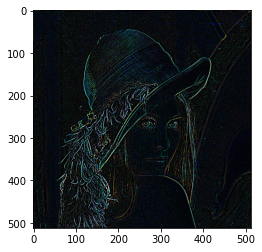

In [5]:
def convolution_v3(img, mask):
    '''
    Versión 2 de la operación de convolución en una imagen dígital
    Se recibe como entrada la imagen y la máscara de convolución
    Se utiliza la máscara como un numpy array y se realizan las operaciones
    de convolución directamente sin hacer acceso a las posiciones de los 
    tensores
    1. se obtiene la parte de la imagen a la que se le aplicará la operación
    2. se suman y múltiplican los tensores directamente
    3. se restringen los valores a un rango de 0-255
    '''
    new_img=np.zeros(img.shape)
    mask=np.array(mask)
    # se itera sobre los pixeles de la imagen
    for p_x in range(0, img.shape[0]-1):
        for p_y in range(0, img.shape[1]-1):
            for px in range(img.shape[2]):
                # Se obtiene la parte de la imagen que se le va a aplicar la convolución
                part=np.array([[img.item((p_x-1,p_y-1,px)),img.item((p_x-1,p_y,px)),img.item((p_x-1,p_y+1,px))],
                               [img.item((p_x,p_y-1,px)),  img.item((p_x,p_y,px)),  img.item((p_x,p_y+1,px))],
                               [img.item((p_x+1,p_y-1,px)),img.item((p_x+1,p_y,px)),img.item((p_x+1,p_y+1,px))]])
                # Se realiza la operación de convolución
                new_img.itemset((p_x,p_y,px),np.sum(part*mask))
    # Se restringen los valores a un rango de 0-255
    return np.clip(new_img.astype(int), 0, 255)

# máscara de convolución
mask=[[-1.0, -1.0, -1.0],
      [-1.0,  8.0, -1.0],
      [-1.0, -1.0, -1.0]]

# Se encuentra el tiempo de ejecución
start_time = time.perf_counter()
img=convolution_v3(original_img, mask)
finish_time = time.perf_counter()

# Se imprime el tiempo de ejecución y se muestra la imagen
print(f"Program finished in {finish_time-start_time} seconds")
plt.imshow(img)
plt.show()

Program finished in 9.483832727999925 seconds


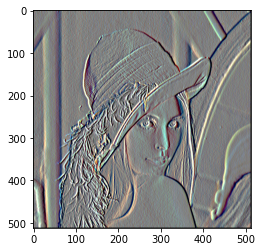

In [6]:
def convolution_Robinson(img, mask):
    new_img=np.zeros(img.shape)
    mask=np.array(mask)
    for p_x in range(1,img.shape[0]-1):
        for p_y in range(1,img.shape[1]-1):
            for px in range(img.shape[2]):
                    
                part=np.array([[img.item((p_x-1,p_y-1,px)),img.item((p_x-1,p_y,px)),img.item((p_x-1,p_y+1,px))],
                     [img.item((p_x,p_y-1,px)),  img.item((p_x,p_y,px)),  img.item((p_x,p_y+1,px))],
                     [img.item((p_x+1,p_y-1,px)),img.item((p_x+1,p_y,px)),img.item((p_x+1,p_y+1,px))]])
                new_img.itemset((p_x,p_y,px),127+np.sum(part*mask))
    return np.clip(new_img.astype(int), 0, 255)

mask=[[-1.0,  0.0,1.0],
      [ -1.0, 0.0, 1.0],
     [-1.0,   0.0,1.0]]

start_time = time.perf_counter()
img=convolution_Robinson(original_img, mask)
finish_time = time.perf_counter()

print(f"Program finished in {finish_time-start_time} seconds")

plt.imshow(img)
plt.show()